In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Zoo[1].csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


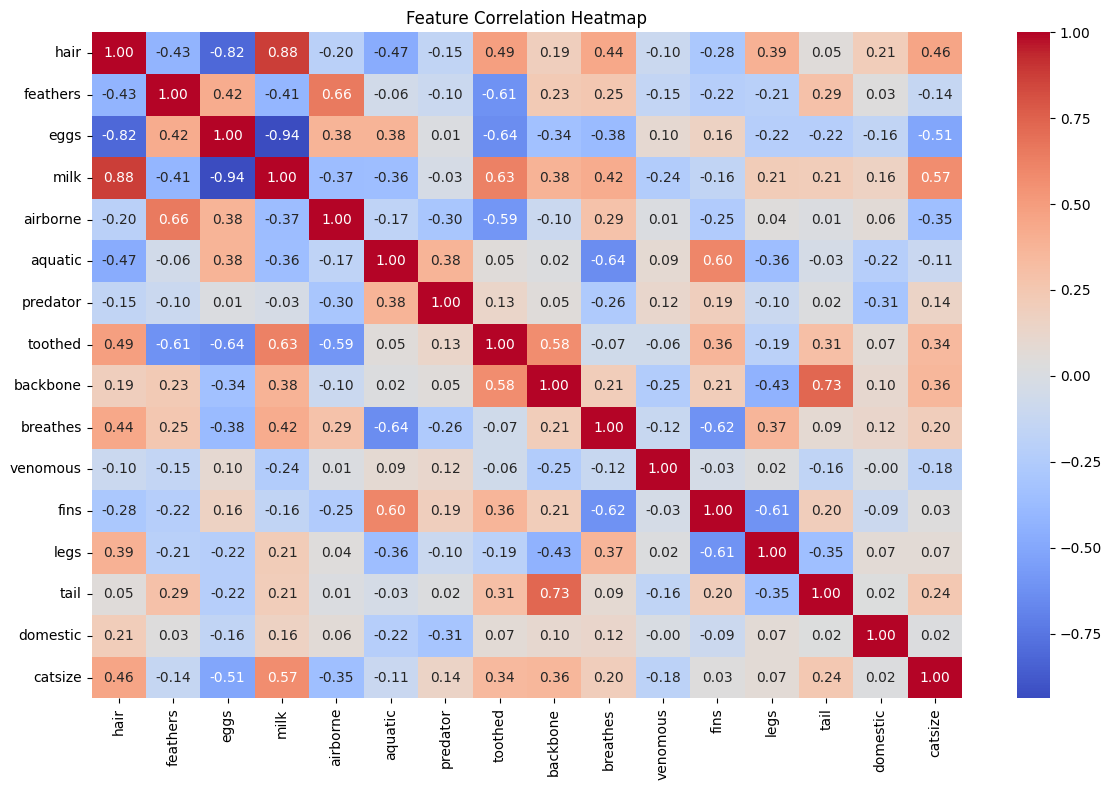

In [ ]:
# Convert 'type' to string for visualization
df['type'] = df['type'].astype(str)

# Heatmap of feature correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['animal name', 'type']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

<ipython-input-5-1c7f23ca6a86>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='tab10')


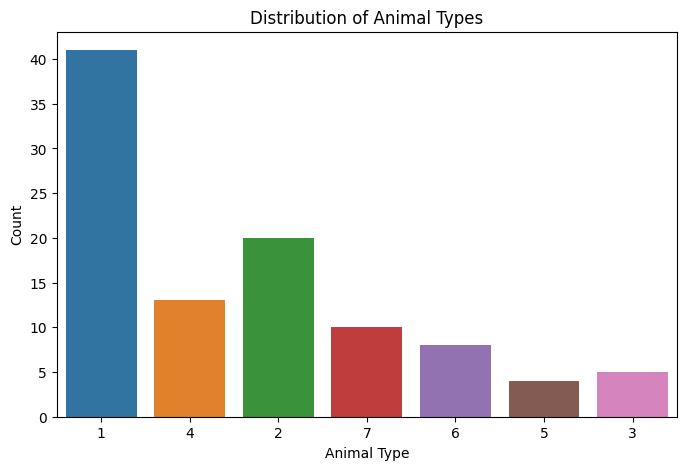

In [ ]:
#  Countplot of animal types
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df, palette='tab10')
plt.title("Distribution of Animal Types")
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.show()


<ipython-input-6-623fc92257df>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='legs', data=df, palette='tab10')


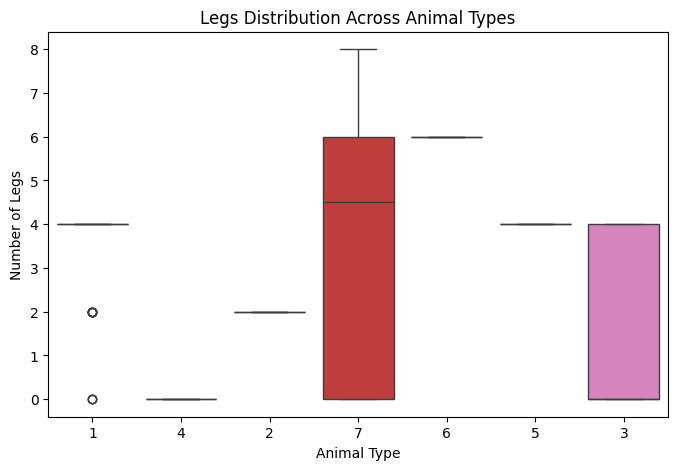

In [ ]:
#  Boxplot to see leg distribution by type
plt.figure(figsize=(8, 5))
sns.boxplot(x='type', y='legs', data=df, palette='tab10')
plt.title("Legs Distribution Across Animal Types")
plt.xlabel("Animal Type")
plt.ylabel("Number of Legs")
plt.show()

In [ ]:
# Data Preprocessing

# Drop 'animal name' since it's not a useful feature for classification
df_cleaned = df.drop(columns=['animal name'])

#  Quick look at the data to check for any anomalies
print("\nBasic statistics for numerical features:\n", df_cleaned.describe())

# Outlier detection using IQR for 'legs' (only feature with range > 1)
Q1 = df_cleaned['legs'].quantile(0.25)
Q3 = df_cleaned['legs'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_cleaned[(df_cleaned['legs'] < Q1 - 1.5 * IQR) | (df_cleaned['legs'] > Q3 + 1.5 * IQR)]

print(f"\nPotential outliers based on 'legs':\n{outliers[['legs', 'type']]}")


Basic statistics for numerical features:
              hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Split the dataset
X = df_cleaned.drop('type', axis=1)
y = df_cleaned['type']

# Scale features for better KNN performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # you can try other distances too
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the performance
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# You can also get individual metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))




Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0


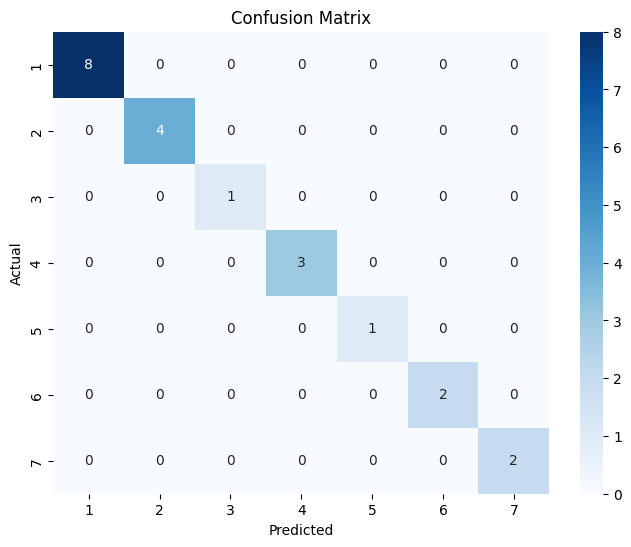

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

# Visualize decision boundaries using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Refit the KNN classifier on PCA-reduced data
knn_pca = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_pca.fit(X_train_pca, y_train_int)

KNeighborsClassifier(metric='euclidean')

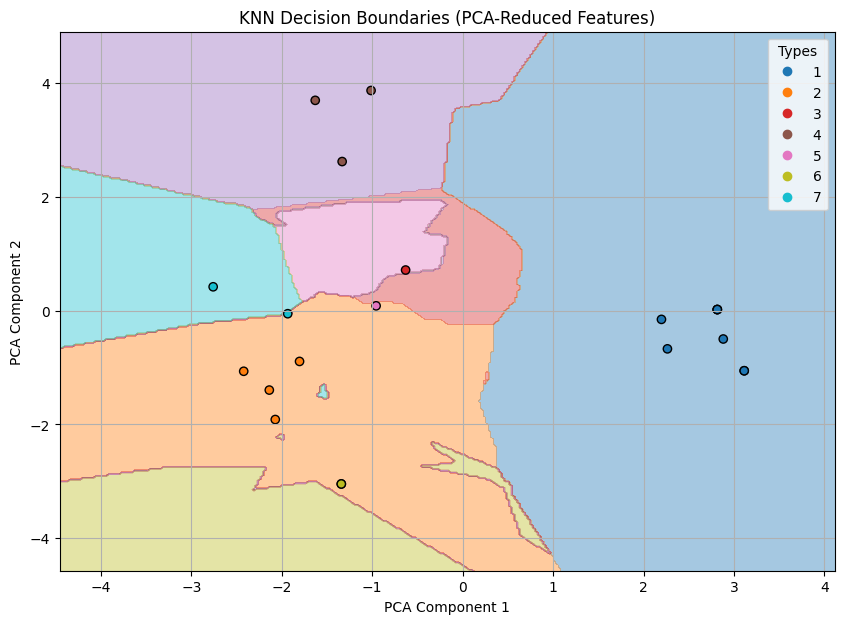

In [ ]:
# Create a meshgrid for plotting decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plotting
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='tab10')
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test.astype(int), cmap='tab10', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Types")
plt.title("KNN Decision Boundaries (PCA-Reduced Features)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

1.Key Hyperparameters in KNN:
The key hyperparameters in KNN that affect its performance are:

-> k (Number of Neighbors): This is the number of neighbors the algorithm looks at to make a prediction. A smaller k leads to a more flexible decision boundary, while a larger k results in a smoother, less sensitive boundary. Too small of a k can lead to overfitting, and too large can cause underfitting.

-> weights: This parameter determines how much influence each neighbor has on the prediction. The options are:

  * uniform: All neighbors contribute equally.

  * distance: Neighbors closer to the query point have more influence, weighted by the inverse of their distance.

-> algorithm: Specifies the algorithm used to compute the nearest neighbors. Options include:

  * auto: Automatically chooses the best algorithm based on the dataset.

  * ball_tree: A data structure for efficient nearest neighbor searches.

  * kd_tree: Another data structure for efficient searches.

  * brute: A brute force approach, checking all points.

p: This is the power parameter used for the Minkowski distance metric (which is a generalization of Euclidean and Manhattan distances).

* p = 1 gives the Manhattan distance.

* p = 2 gives the Euclidean distance.

-> leaf_size: For ball_tree and kd_tree algorithms, this controls the size of leaf nodes in the tree. It affects performance (search speed) and memory usage.

2.Distance Metrics in KNN:
While you used Euclidean distance in your assignment, KNN allows several distance metrics. The most common ones include:

-> Euclidean Distance:

𝑑
=
∑
𝑖
=
1
𝑛
(
𝑥
𝑖
−
𝑦
𝑖
)
2
d=
i=1
∑
n
​
 (x
i
​
 −y
i
​
 )
2

​

This is the most widely used distance metric and is effective in many cases.

-> Manhattan Distance (L1 norm):

𝑑
=
∑
𝑖
=
1
𝑛
∣
𝑥
𝑖
−
𝑦
𝑖
∣
d=
i=1
∑
n
​
 ∣x
i
​
 −y
i
​
 ∣
This is often used in grid-like environments where diagonal movement isn’t allowed.

-> Minkowski Distance: A generalization of both Euclidean and Manhattan. It’s parameterized by p, where p=1 is Manhattan and p=2 is Euclidean.

-> Cosine Similarity: Measures the cosine of the angle between two vectors, useful when the magnitude of the vectors is not as important as the angle between them. Often used in text mining or high-dimensional data.

-> Chebyshev Distance: Measures the maximum absolute difference between coordinates. Often used when you are only interested in the largest difference.

-> Hamming Distance: Used for categorical data where the distance is simply the count of mismatches in corresponding dimensions.

Summary:
-> Key Hyperparameters: k, weights, algorithm, p, leaf_size

-> Common Distance Metrics: Euclidean, Manhattan, Minkowski, Cosine, Chebyshev, Hamming